In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.model_selection import train_test_split,cross_val_score ,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from statistics import mean 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

In [20]:
dataset = pd.read_csv('heart_random.csv') 

In [21]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.00000,3030.000000,3030.000000,3030.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.39934,0.729373,2.313531,0.544554
std,9.068598,0.465318,1.030518,17.512068,51.753692,0.355668,0.525078,22.871107,0.469096,1.159349,0.61531,1.021086,0.611366,0.498093
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.00000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.00000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.00000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,4.000000,3.000000,1.000000


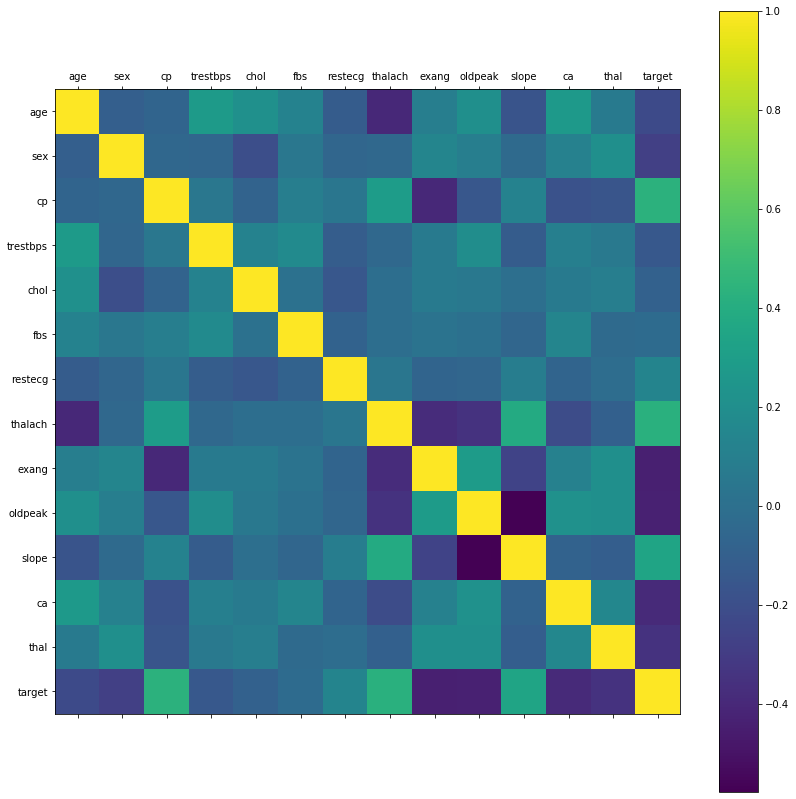

In [22]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B076D2F2B0>,
      dtype=object)

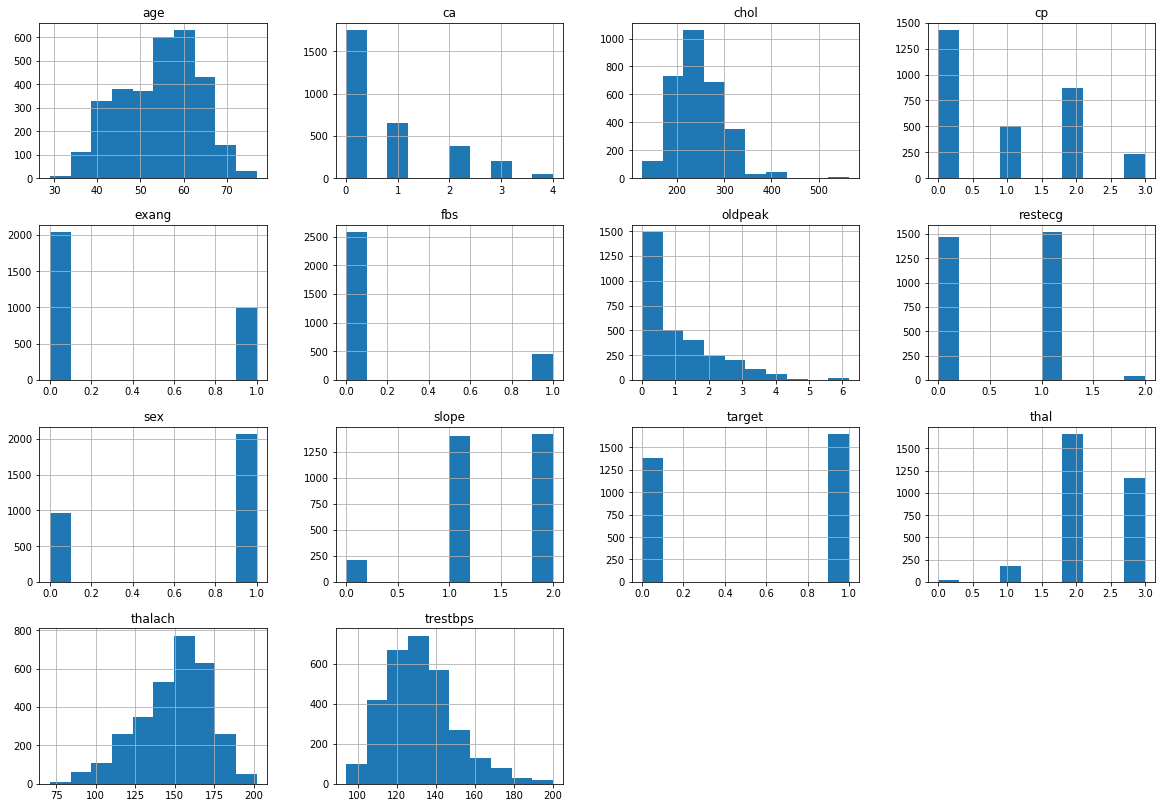

In [23]:
dataset.hist()

In [24]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [25]:
Scaler = StandardScaler()
columns_to_scale = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = Scaler.fit_transform(dataset[columns_to_scale])

In [26]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,3.030000e+03,3.030000e+03,3.030000e+03,3.030000e+03,3.030000e+03,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,...,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000
mean,4.803638e-17,-7.257304e-16,-9.424987e-17,-5.163453e-16,-3.268746e-16,0.544554,0.316832,0.683168,0.471947,0.165017,...,0.468647,0.577558,0.214521,0.125413,0.066007,0.016502,0.006601,0.059406,0.547855,0.386139
std,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,0.498093,0.465318,0.465318,0.499295,0.371257,...,0.499098,0.494030,0.410558,0.331241,0.248335,0.127415,0.080989,0.236422,0.497787,0.486943
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.124246e-01,-6.638668e-01,-6.814943e-01,-7.279758e-01,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.316189e-01,4.783913e-01,5.553365e-01,7.151309e-01,4.834512e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.18, random_state = 0)

In [28]:
classifier = LogisticRegression(C=1,tol=0.001,random_state = 0) 
classifier.fit(X_train, y_train) 

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = classifier.predict(X_test) 

In [30]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100) 
print("F1 Score :", f1_score(y_test, y_pred, average="macro"))
print("Precison :", precision_score(y_test, y_pred, average="macro"))
print("Recall :", recall_score(y_test, y_pred, average="macro"))   

Accuracy :  87.54578754578755
F1 Score : 0.8738310134841236
Precison : 0.8806686527639854
Recall : 0.8717672413793103


In [31]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
y_pred = gnb.predict(X_test) 

In [33]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100) 
print("F1 Score :", f1_score(y_test, y_pred, average="macro"))
print("Precison :", precision_score(y_test, y_pred, average="macro"))
print("Recall :", recall_score(y_test, y_pred, average="macro"))   

Accuracy :  82.96703296703298
F1 Score : 0.8276579496665366
Precison : 0.8327561327561328
Recall : 0.8261449353448276


In [34]:
ridgeReg = Ridge(alpha=0.01, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)
pred = np.where(pred >0.5, 1, 0)

In [35]:
print ("Accuracy : ", accuracy_score(y_test, pred)*100) 
print(ridgeReg.score(X_test,y_test))
mse = np.mean((pred - y_test)**2)
print("mse :=", mse)

Accuracy :  86.99633699633699
0.5445069102994873
mse := 0.13003663003663005


In [36]:
lassoReg = Lasso(alpha=0.001, normalize=True)

lassoReg.fit(X_train,y_train)
pred = lassoReg.predict(X_test)
pred = np.where(pred >0.5, 1, 0)

In [37]:
print ("Accuracy : ", accuracy_score(y_test, pred)*100) 
print(lassoReg.score(X_test,y_test))
mse = np.mean((pred - y_test)**2)
print("mse :=", mse)

Accuracy :  82.96703296703298
0.49588273679206046
mse := 0.17032967032967034


In [38]:
lreg = LinearRegression()

In [39]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
pred = lreg.predict(X_test)
pred = np.where(pred >0.5, 1, 0)

In [41]:
print ("Accuracy : ", accuracy_score(y_test, pred)*100) 
print(lreg.score(X_test,y_test))
mse = np.mean((pred - y_test)**2)
print("mse :=", mse)

Accuracy :  87.17948717948718
0.5445185546370717
mse := 0.1282051282051282


In [42]:
ann_clf = MLPClassifier()

parameters = {'solver': ['lbfgs'],'alpha':[1e-4],'hidden_layer_sizes':(9,14,14,2),'random_state': [1]}

In [43]:
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)


ann_clf = grid_obj.best_estimator_

In [44]:
ann_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=14, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [45]:
y_pred_ann = ann_clf.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)
cm_ann

array([[256,   0],
       [  0, 290]], dtype=int64)

In [47]:
ann_result = accuracy_score(y_test,y_pred_ann)
ann_result

1.0

In [50]:
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
recall_ann,precision_ann

(1.0, 0.46886446886446886)